<a href="https://colab.research.google.com/github/KARTIKPARATKAR/DEEP-LEARNING-WORK/blob/main/Sef_AttentionInTransformers(How).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Most important thing in creating NLP application is that how you convert words into numbers. Best technique of doing it is Word-Embeddings. But word-Embeddings is a static representation of the input word. When that same word is being used in another context , our word-embedding for same word which is being used at different context should be different . But as word-embedding technique is static , we were not able to change the embedded vector of the word.If word bank is used in context of money and river , then this word bank should have two different embedded vector for different context.So for generating this two different embedded vectors for the same word in two different context,self_attention technique helps us. Self-attention takes word-embedded vectors as inut and convert it into contextual embedded vector representation.

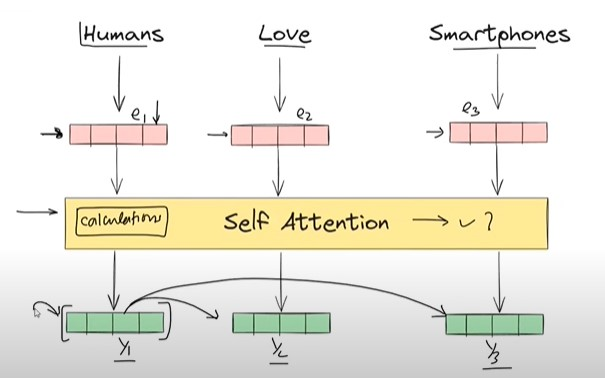

Here we have e1 , e2 and e3 are three word-embedded vectors of words humans , love and smartphones. We are passing it through self-attention block and we are getting y1,y2 and y3 as self_attention dynamic vector representation of words humans,love and smartphones respectively which can understand that the perticular word is being used in which context.

**How Self Attention Works?**

We have two sentences "money bank grows" and "river bank flows". Word bank is used in both the sentence but with differnt meaninig and context. If we simply apply word-embeddings in thhese two words then we will have the same vector representation of both the words which is not correct because both word bank has different meaning. We need to change the meaninig of word bank according to the context where it is being used.

What we will do is , we wont write bank as bank strainghtway . We will write bank as 0.3money,0.7bank,0.1grows and in other sentence we will write bank as 0.5river,0.4bank,0.1flows.In a nutshell the word bank is relying on other words present in that perticular sentence.

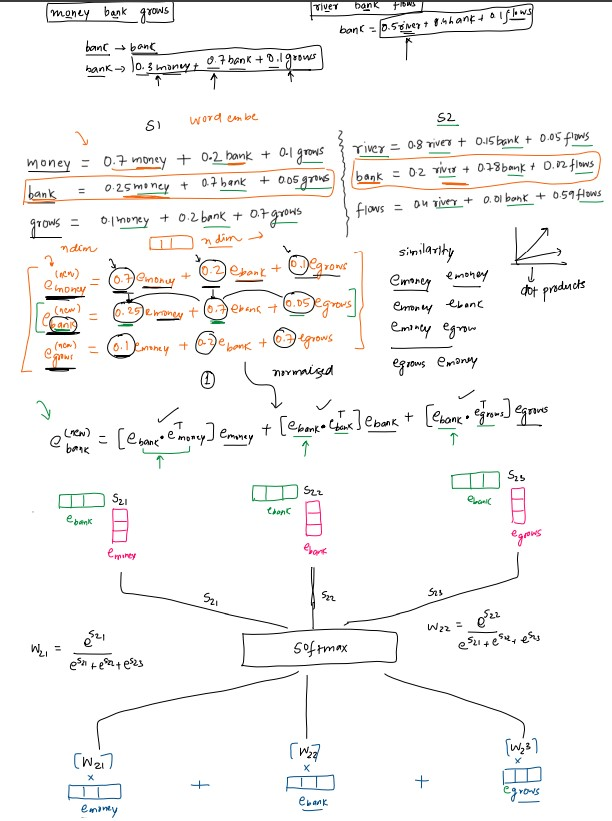

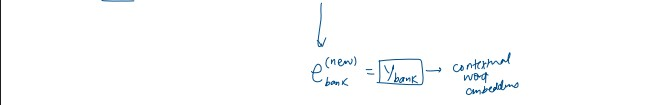

Here we have written the each word in both the sentences with the dependant embedding value of other word present in that sentence.We have used softmax function to handle the negative values of the dot product of two embedding values in the equation.The final contextual output of the word embedding is the weighted sum of embedding of all the words present in the sentence.

If we have 3 words in a sentence and we have to claculate the contextual word embedding of each word , then we proceed like below:

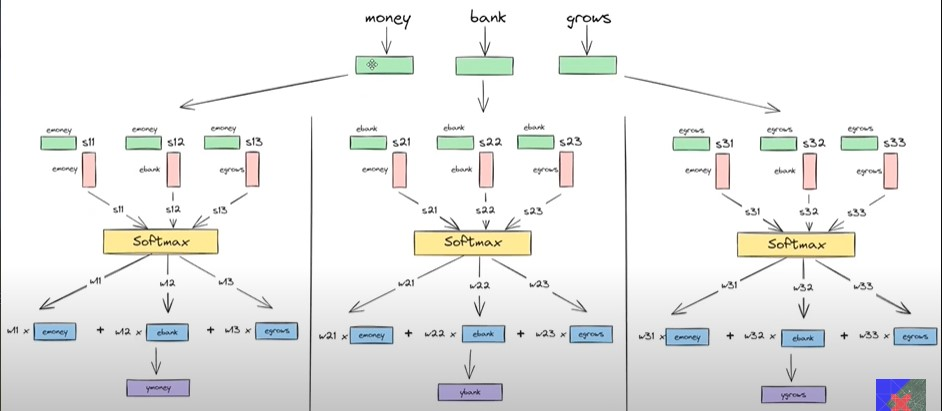

**Points To Consider -**

1) When we observe the above calculation of contexual word embedding of 3 words. There is no reason availble by which we can not perform these 3 calcuations parallely.With the help of algebra we can execute these 3 calculations parallely.Following is the matrix multiplication flow by which we can calculate these 3 contextual word embeddings parallely.



> Add blockquote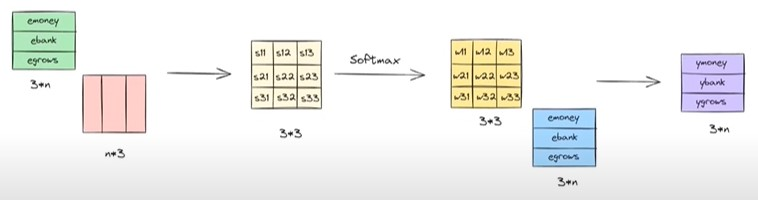


2) There is no learnable parameters avilable in parallel calculations of contextual word embedding of the perticular sentence.SO this means that this process of caculations of contextual word embedding of perticular word is independant of the task we are performing as there is no learnable parameters.It would have been better had we add some weights and biases in this calculation so that the process would know the data and which task we are performing in that data.

* Why it is better to have dependency of the calculation of contextual word embedding of a word on model and task that we are performing?

* Ans : Let we have sentence "piece of cake" , the general meaning would be "cake ka tukda" but what if in our dataset the meaning of this sentence is taken as "bahut asan kam".So general purpose calculation of contextual embedding would never know the hindi translation of this sentence is "bahut asan kam". This happens due to not having any information about model/data and task that we are performing.If we add some of the trainable parameters in calculation of contexual word embedding , it would know the actual conversion of the sentence that is used in the dataset for the perticular task.

Now our task is to somehow add some trainable parameters in calculations of contexual word embedding of the words.


**Adding Learnable Parameters in Calculation of Word Embedding of words:**

We have a mathematical flow of calculationn of word embedding for a perticular word as above. In that flow , there are 2 dot product and one softmax operation. We can not add weights in softmax operation . So there are only 2 places where we are performing the dot operation where we can introduce the trainable weights and those places are dot product operation.

In the process of calculation of contextual word embedding , each word embedding of the word sometimes plays role of query or value or key.



**Query , Key and Vector:**

So word embedding of a perticular word is performing the role of Query , Key as well as Vector in calculation of contexual word embedding and we dont want a single vector to perform these 3 tasks because we want to keep the separation of concerns between key , vector and value part of the word embedding. To resolve this , we can generate the three word embeddings of the single word which will perform the key , vector and value part in calculation of contextual word embeddings. evalue , evector and ekey will work as value , vector and key respectively in calculation of contextual word embedding of that perticular word.Calculating 3 different emnbeddings of a perticular word embedding works better because we are assigning the 3 different tasks of key , vector and value to 3 different word embedding vectors.

**How are we generating the 3 different word embeddings from one word embedding of the word?**

This is how we will be generating the 3 different word embeddings for key , vector and value of a single word embedding.

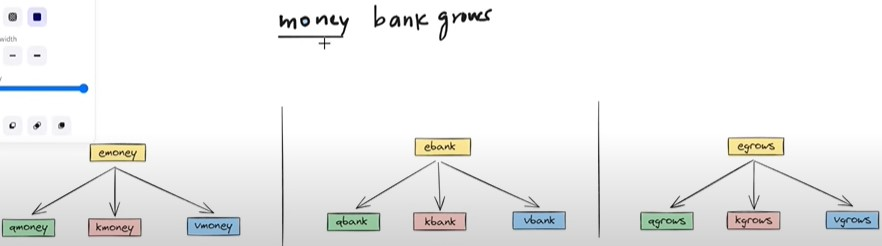

SO now we have one word embedding vector from which we have to generate 3 different vectors for value , vector and key part of that perticular word for calculation of contextual word embeddings.

We will use linear transformation technique to create 3 different vectors for value , vector and key part.

Let we have embedding vector as ebank,we will mulitipy this ebank vector with 3 different matrix which will give us 3 different metrices that plays the role of key , vector and value part in calculation of contextual word embedding.And these multiplying vectors we will get from the input data.Basically training process will decide the values of these 3 multiplying vectors with initially initilizing it with random values.Which means when the training of the model will get over , we will have the perfect values in these metrices because it has been learned on the input data during model training.

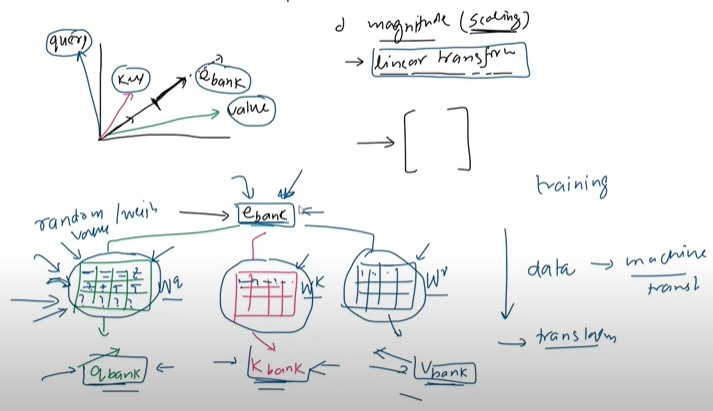

So the multiplication of matrix we will perform as follows.We have a word money , we create a word embedding of word money as emoney.Now we have three randomly initilized value metrices as wa(query) , wk(key) and wv(vector) with which we will multiply emoney and get the qmoney(contextual word embedding vector for query),kmoney(contextual word embedding vector for key) and vmoney(contextual word embedding vector for value). This same process can be perform for other words like bank and grows.


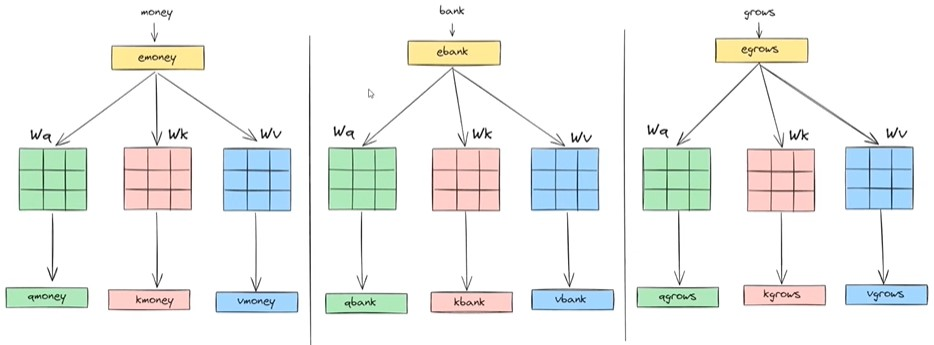